**Step 5 - Data preprocessing**
- Dealing with missing values
- Dataset Scaling 
- Data Scaling
- Data Labeling

In [1]:
def analyze_missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    prcnt1 = df.isnull().sum()/df.isnull().count()*100
    prcnt2 = (round(prcnt1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, prcnt2], axis=1, keys=['Total', '%'])
    return missing_data

In [2]:
def transform_numbers_scaler(data, features):
    scalers = {}

    for feature in features:
        scaler = StandardScaler()
        data[feature] = scaler.fit_transform(data[[feature]])
        scalers[feature] = scaler
    
    with open('scalers.pkl', 'wb') as file:
        pickle.dump(scalers, file)

In [3]:
def transform_categories_to_numbers(data, features):
    label_encoders = {}

    for feature in features:
        label_encoder = LabelEncoder()
        data[feature] = label_encoder.fit_transform(data[feature])
        label_encoders[feature] = label_encoder
    
    with open('label_encoders.pkl', 'wb') as file:
        pickle.dump(label_encoders, file)

In [4]:
import pandas as pd



import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
df = pd.read_csv('Pathrise_prepared.csv')

## Dealing with missing values

In [6]:
analyze_missing_values(df=df)

,Total,%
program_duration_days,598,24.2
gender,478,19.3
work_authorization_status,282,11.4
employment_status,226,9.1
professional_experience,216,8.7
number_of_interviews,214,8.7
length_of_job_search,74,3.0
highest_level_of_education,55,2.2
biggest_challenge_in_search,22,0.9
race,17,0.7


cohort_tag is going to remove from Dataset.


biggest_challenge_in_search , and race has under 1 percent Null values. So maybe we can easyly fill them with approperiate values. program_duration_days has more than 24 percent Null values and we should carefully fill it with proper values. I don't want to drop it from Dataset because I believe it strongly related to target value its more tricky to deal with features with more than 1 percent and less than 20 percent Null value. it needs more investigation. let's continue with the process

### program_duration_days

In [7]:
df[~df['program_duration_days'].notnull()]['pathrise_status'].value_counts()

pathrise_status
Active    519
MIA        49
Break      30
Name: count, dtype: int64

There are have 616 totaly null value in program_duration_days and **564** of them are remove when I remove rows with pathrise_status equal to Active or Break. Thus I should take care of **52** null values approximately **2** percent of rows.

### gender

In [8]:
df['gender'].value_counts()

gender
Male                        1448
Female                       525
Decline to Self Identify      15
Non-Binary                     6
Name: count, dtype: int64

we have 492 missing value in Gender features. In real projects we can extract such thing from the title or even the honorific in their fullname but here we don't have access to such data. In this scenario I can replace those values with ***Decline to Self Identify*** because somehow they not declared their gender.

In [9]:
df['gender'] = df['gender'].fillna('Decline to Self Identify')

In [10]:
df['gender'].value_counts()

gender
Male                        1448
Female                       525
Decline to Self Identify     493
Non-Binary                     6
Name: count, dtype: int64

### work_authorization_status

In [11]:
df['work_authorization_status'].fillna('missed').value_counts()

work_authorization_status
Citizen           1067
F1 Visa/OPT        622
missed             282
Green Card         177
F1 Visa/CPT        131
Other              112
H1B                 47
Canada Citizen      22
STEM OPT             8
Not Authorized       4
Name: count, dtype: int64

There are 284 missing value in work_authorization_status feature. Let's check what did they do before joining the program.

In [12]:
df[df['work_authorization_status'].isnull()]['employment_status'].value_counts()

employment_status
Student               90
Unemployed            77
Employed Full-Time    44
Employed Part-Time    28
Contractor            16
Name: count, dtype: int64

There are some fellows which have working experience so they were authorized to work but I don't know the type of their Visa, so I can put them in a new category called Autorized category status. But for ***Student*** and ***Unemployed*** I don't khnow whether they were ***autorized*** or not, so I decided to put them in a new category called ***missed***

In [13]:
employment_status_list=['Employed Full-Time', 'Employed Part-Time', 'Contractor']

filtered = df['work_authorization_status'].isnull() & df['employment_status'].isin(employment_status_list)
    
df.loc[filtered,'work_authorization_status']=df.loc[filtered,'work_authorization_status'].fillna('Autorized')

Processing rest of work_authorization_status missing values: for **employment_status_list** as Student and Unemployed and also for those which **employment_status_list** is missing

In [14]:
df['work_authorization_status'].fillna('missed', inplace=True)

In [15]:
df['work_authorization_status'].fillna('*****').value_counts()

work_authorization_status
Citizen           1067
F1 Visa/OPT        622
missed             194
Green Card         177
F1 Visa/CPT        131
Other              112
Autorized           88
H1B                 47
Canada Citizen      22
STEM OPT             8
Not Authorized       4
Name: count, dtype: int64

### employment_status

In [16]:
df['employment_status'].value_counts()

employment_status
Student               755
Unemployed            637
Employed Full-Time    426
Employed Part-Time    261
Contractor            167
Name: count, dtype: int64

In [17]:
df['employment_status'].fillna('Missed', inplace=True)

In [18]:
df['employment_status'].value_counts()

employment_status
Student               755
Unemployed            637
Employed Full-Time    426
Employed Part-Time    261
Missed                226
Contractor            167
Name: count, dtype: int64

### professional_experience

In [19]:
df['professional_experience'].fillna('Missed').value_counts()

professional_experience
1-2 years             855
Less than one year    601
3-4 years             549
5+ years              251
Missed                216
Name: count, dtype: int64

In [20]:
df['professional_experience'].fillna('Missed', inplace=True)

### number_of_interviews

In [21]:
df['number_of_interviews'].describe()

count    2258.000000
mean        1.895926
std         2.099491
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        11.000000
Name: number_of_interviews, dtype: float64

In [22]:
df['number_of_interviews'].fillna(-1).value_counts()

number_of_interviews
 0.0     750
 1.0     519
 2.0     302
-1.0     214
 3.0     203
 4.0     190
 5.0     134
 6.0      74
 7.0      59
 10.0     16
 8.0       5
 11.0      4
 9.0       2
Name: count, dtype: int64

In [23]:
df['number_of_interviews'].fillna(int(df['number_of_interviews'].mean()), inplace=True)

### length_of_job_search

In [24]:
df['length_of_job_search'].value_counts()

length_of_job_search
Less than one month    800
1-2 months             759
3-5 months             494
6 months to a year     228
Over a year            117
Name: count, dtype: int64

In [25]:
df['length_of_job_search'].fillna('missed').value_counts()

length_of_job_search
Less than one month    800
1-2 months             759
3-5 months             494
6 months to a year     228
Over a year            117
missed                  74
Name: count, dtype: int64

In [26]:
df['length_of_job_search'].fillna('Less than one month', inplace=True)

In [27]:
df['length_of_job_search'].fillna('missed').value_counts()

length_of_job_search
Less than one month    874
1-2 months             759
3-5 months             494
6 months to a year     228
Over a year            117
Name: count, dtype: int64

### highest_level_of_education

In [28]:
df['highest_level_of_education'].value_counts()

highest_level_of_education
Bachelor's Degree                   1320
Master's Degree                      789
Some College, No Degree              134
Doctorate or Professional Degree     130
GED or equivalent                     15
Some High School                      15
High School Graduate                  14
Name: count, dtype: int64

In [29]:
df['highest_level_of_education'].fillna('missed').value_counts()

highest_level_of_education
Bachelor's Degree                   1320
Master's Degree                      789
Some College, No Degree              134
Doctorate or Professional Degree     130
missed                                55
GED or equivalent                     15
Some High School                      15
High School Graduate                  14
Name: count, dtype: int64

In [30]:
df['highest_level_of_education'].fillna('missed', inplace=True)

In [31]:
df['highest_level_of_education'].value_counts()

highest_level_of_education
Bachelor's Degree                   1320
Master's Degree                      789
Some College, No Degree              134
Doctorate or Professional Degree     130
missed                                55
GED or equivalent                     15
Some High School                      15
High School Graduate                  14
Name: count, dtype: int64

### biggest_challenge_in_search

In [32]:
df['biggest_challenge_in_search'].value_counts()

biggest_challenge_in_search
Hearing back on my applications         968
Getting past final round interviews     286
Technical interviewing                  279
Lack of relevant experience             221
Getting past mid-stage interviews       204
Figuring out which jobs to apply for    183
Getting past phone screens              174
Behavioral interviewing                  59
Resume gap                               40
Technical skills                         36
Name: count, dtype: int64

In [33]:
df['biggest_challenge_in_search'].fillna('missed').value_counts()

biggest_challenge_in_search
Hearing back on my applications         968
Getting past final round interviews     286
Technical interviewing                  279
Lack of relevant experience             221
Getting past mid-stage interviews       204
Figuring out which jobs to apply for    183
Getting past phone screens              174
Behavioral interviewing                  59
Resume gap                               40
Technical skills                         36
missed                                   22
Name: count, dtype: int64

In [34]:
df['biggest_challenge_in_search'].fillna('Hearing back on my applications', inplace=True)

In [35]:
df['biggest_challenge_in_search'].value_counts()

biggest_challenge_in_search
Hearing back on my applications         990
Getting past final round interviews     286
Technical interviewing                  279
Lack of relevant experience             221
Getting past mid-stage interviews       204
Figuring out which jobs to apply for    183
Getting past phone screens              174
Behavioral interviewing                  59
Resume gap                               40
Technical skills                         36
Name: count, dtype: int64

### race

In [36]:
df['race'].fillna('missed').value_counts()

race
East Asian or Asian American                  866
Non-Hispanic White or Euro-American           563
South Asian or Indian American                525
Latino or Hispanic American                   151
Black, Afro-Caribbean, or African American    121
Two or More Races                              94
Decline to Self Identify                       66
Middle Eastern or Arab American                66
missed                                         17
Native American or Alaskan Native               3
Name: count, dtype: int64

In [37]:
df['race'].fillna('Decline to Self Identify', inplace=True)

In [38]:
df['race'].value_counts()

race
East Asian or Asian American                  866
Non-Hispanic White or Euro-American           563
South Asian or Indian American                525
Latino or Hispanic American                   151
Black, Afro-Caribbean, or African American    121
Two or More Races                              94
Decline to Self Identify                       83
Middle Eastern or Arab American                66
Native American or Alaskan Native               3
Name: count, dtype: int64

### cohort_tag_month

In [39]:
df['cohort_tag_month'].fillna('missed').value_counts()

cohort_tag_month
JAN       419
OCT       280
FEB       271
SEP       269
AUG       258
DEC       174
NOV       162
JUN       159
MAR       158
APR       139
JUL       106
MAY        69
missed      8
Name: count, dtype: int64

In [40]:
df['cohort_tag_month'].fillna('FEB', inplace=True)

In [41]:
df['cohort_tag_month'].value_counts()

cohort_tag_month
JAN    419
OCT    280
FEB    279
SEP    269
AUG    258
DEC    174
NOV    162
JUN    159
MAR    158
APR    139
JUL    106
MAY     69
Name: count, dtype: int64

### cohort_tag_fortnight

In [42]:
df['cohort_tag_fortnight'].fillna('missed').value_counts()

cohort_tag_fortnight
A         1519
B          812
C          133
missed       8
Name: count, dtype: int64

In [43]:
df['cohort_tag_fortnight'].fillna('B', inplace=True)

In [44]:
df['cohort_tag_fortnight'].value_counts()

cohort_tag_fortnight
A    1519
B     820
C     133
Name: count, dtype: int64

In [45]:
analyze_missing_values(df=df)

,Total,%
program_duration_days,598,24.2
cohort_tag,8,0.3
pathrise_status,0,0.0
work_authorization_status,0,0.0
cohort_tag_month,0,0.0
race,0,0.0
gender,0,0.0
number_of_applications,0,0.0
number_of_interviews,0,0.0
biggest_challenge_in_search,0,0.0


We are going to remove pathrise_status equal to Active rows. Here we want to decide what to do with program_duration_days null records

In [46]:
# remove rows with pathrise_status as 'Active'
df.drop(df[df['pathrise_status']=='Active'].index, axis=0, inplace=True)

In [47]:
df['pathrise_status'].unique()

array(['Closed Lost', 'Placed', 'Withdrawn (Failed)', 'Withdrawn (Trial)',
       'Withdrawn', 'Deferred', 'Break', 'MIA'], dtype=object)

In [48]:
df.shape

(1953, 17)

Now that the unnecessary data removed from Dataset lets finish the dealing with missing values job

In [49]:
df[df['program_duration_days'].isnull()].groupby(['pathrise_status']).describe()

program_duration_days                              placed   
                                count mean std min 25% 50% 75% max  count   
pathrise_status                                                             
Break                             0.0  NaN NaN NaN NaN NaN NaN NaN   30.0  \
MIA                               0.0  NaN NaN NaN NaN NaN NaN NaN   49.0   

                      ... number_of_interviews      number_of_applications   
                mean  ...                  75%  max                  count   
pathrise_status       ...                                                    
Break            0.0  ...                 2.75  6.0                   30.0  \
MIA              0.0  ...                 2.00  5.0                   49.0   

                                                                     
                      mean        std  min  25%   50%    75%    max  
pathrise_status                                                      
Break            20.500000  19.381381  0.0  6.0  15.0  28.75   80.0  
MIA              34.244898  38.661744  0.0  9.0  25.0  45.00  190.0  

[2 rows x 32 columns]

In [50]:
filtered = df['pathrise_status']=='MIA'
    
df.loc[filtered,'program_duration_days']=df.loc[filtered,'program_duration_days'].fillna(0)

In [51]:
filtered = df['pathrise_status']=='Break'
    
df.loc[filtered,'program_duration_days']=df.loc[filtered,'program_duration_days'].fillna(0)

### Remove unnecessary features


In [52]:
df.drop(columns=['pathrise_status', 'cohort_tag'], axis=1, inplace=True)

In [53]:
analyze_missing_values(df=df)

,Total,%
primary_track,0,0.0
program_duration_days,0,0.0
placed,0,0.0
employment_status,0,0.0
highest_level_of_education,0,0.0
length_of_job_search,0,0.0
biggest_challenge_in_search,0,0.0
professional_experience,0,0.0
work_authorization_status,0,0.0
number_of_interviews,0,0.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1953 entries, 1 to 2471
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1953 non-null   object 
 1   program_duration_days        1953 non-null   float64
 2   placed                       1953 non-null   int64  
 3   employment_status            1953 non-null   object 
 4   highest_level_of_education   1953 non-null   object 
 5   length_of_job_search         1953 non-null   object 
 6   biggest_challenge_in_search  1953 non-null   object 
 7   professional_experience      1953 non-null   object 
 8   work_authorization_status    1953 non-null   object 
 9   number_of_interviews         1953 non-null   float64
 10  number_of_applications       1953 non-null   int64  
 11  gender                       1953 non-null   object 
 12  race                         1953 non-null   object 
 13  cohort_tag_month       

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt 

<Axes: xlabel='placed', ylabel='count'>

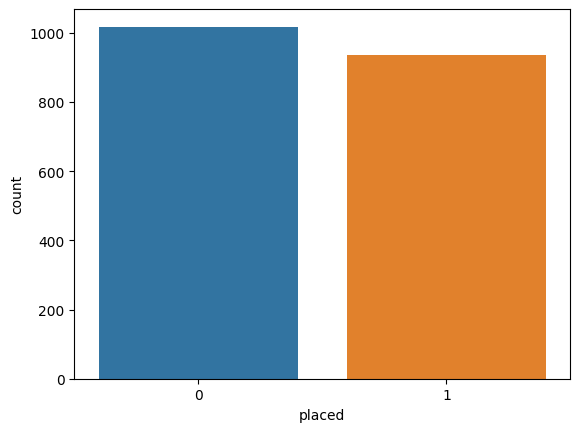

In [56]:
sns.countplot(data=df, x='placed')

<Axes: xlabel='gender'>

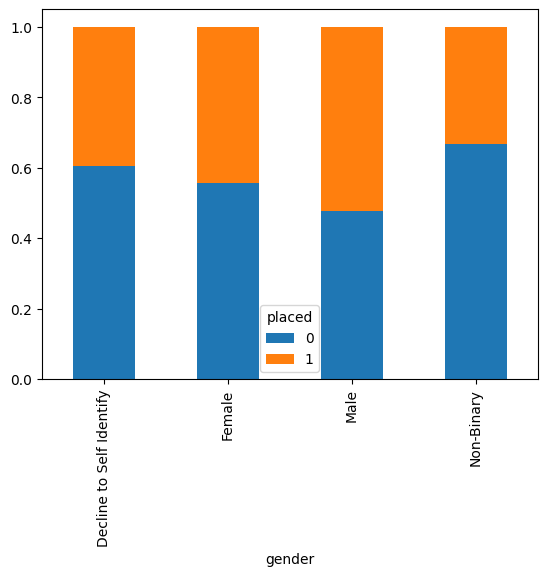

In [59]:
df.groupby('gender')['placed'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=True)

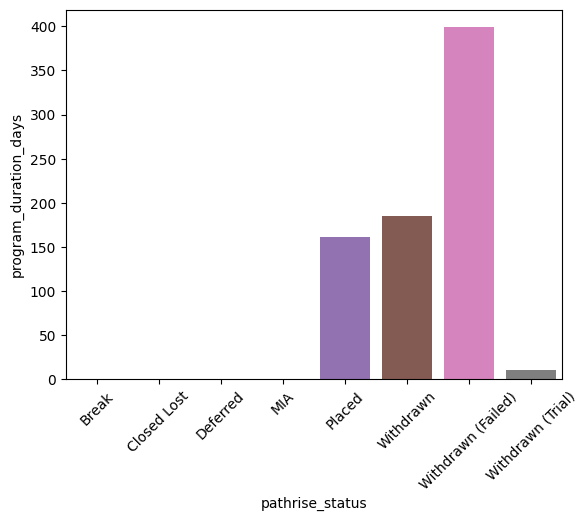

In [68]:
grouped_data=df.groupby("pathrise_status")["program_duration_days"].mean().reset_index()
sns.barplot(x="pathrise_status", y="program_duration_days", data=grouped_data)
plt.xticks(rotation=45)
plt.show()

In [62]:
def overview_numerical_features(data, features, target):
    fig, axes = plt.subplots(len(features)//2 + (len(features)%2), 2, figsize=(15, ((len(features)//4)+1) * 6), dpi=100)
    i=0
    for feature in features:
        sns.kdeplot(data=df, x=feature, hue=target, multiple='stack', palette='colorblind', ax=axes.flatten()[i])
        axes.flatten()[i].set_title(feature)
        i += 1


    plt.show()

In [64]:
numerical_features=['number_of_interviews',
       'number_of_applications']

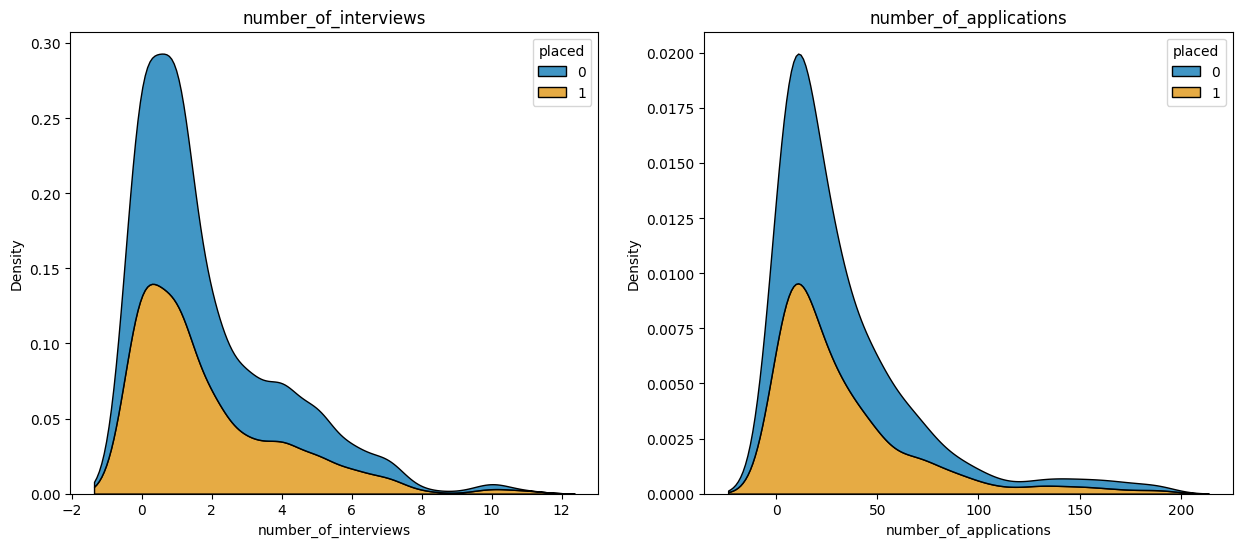

In [67]:
overview_numerical_features(data=df, features=numerical_features, target='placed')

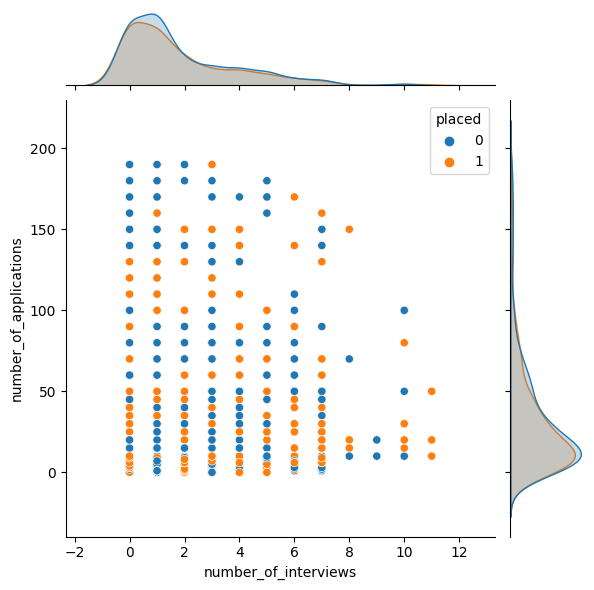

In [69]:
sns.jointplot(data=df, x='number_of_interviews', y='number_of_applications', hue='placed')
plt.show()

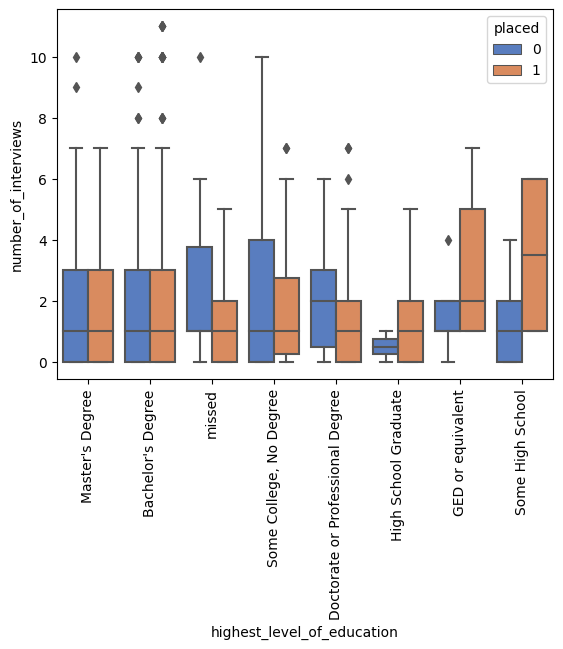

In [70]:
sns.boxplot(data=df, x='highest_level_of_education', y='number_of_interviews', hue='placed', palette='muted')
plt.xticks(rotation=90)
plt.show()

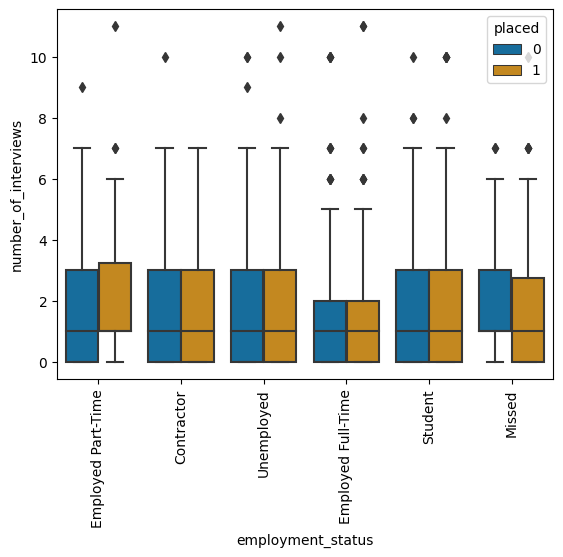

In [71]:
sns.boxplot(data=df, x='employment_status', y='number_of_interviews', hue='placed', palette='colorblind')
plt.xticks(rotation=90)
plt.show()

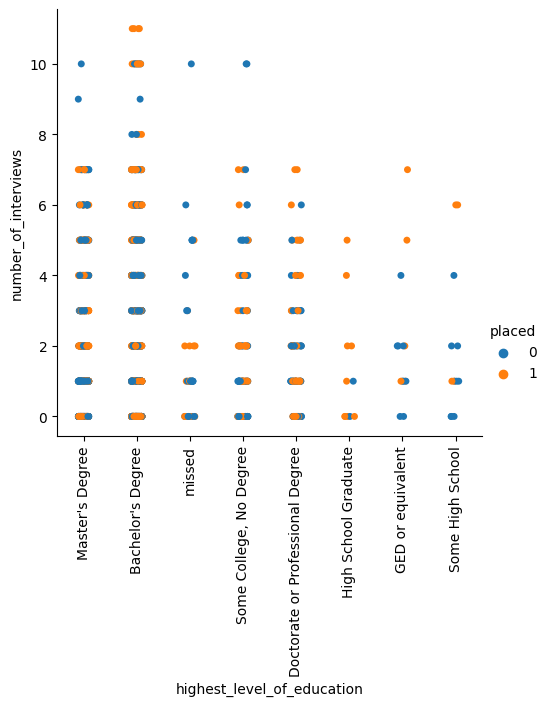

In [72]:
sns.catplot(data=df, x='highest_level_of_education', y='number_of_interviews', hue='placed')
plt.xticks(rotation=90)
plt.show()

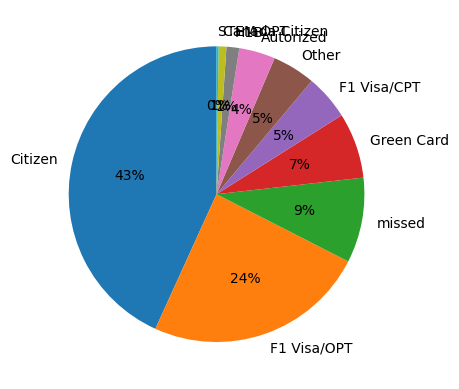

In [73]:
target = 'placed'
feature = 'work_authorization_status'
data = df

df_counts_target = data[data[target]==1].sort_values(by=feature)[feature].value_counts()
count_target = list(df_counts_target.values)
index_target = list(df_counts_target.index)

plt.pie(count_target, labels=index_target, autopct='%.0f%%', startangle=90)
plt.show()

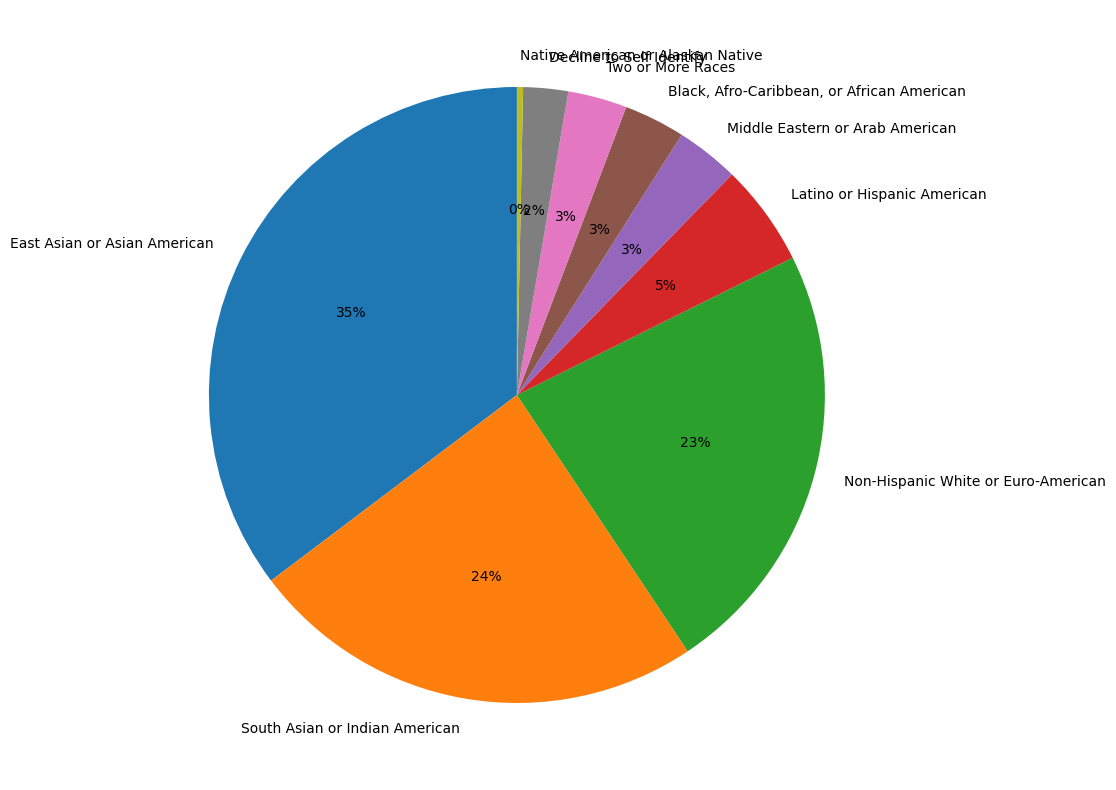

In [76]:
target = 'placed'
feature = 'race'
data = df

df_counts_target = data[data[target]==1].sort_values(by=feature)[feature].value_counts()
count_target = list(df_counts_target.values)
index_target = list(df_counts_target.index)
plt.figure(figsize=(10, 10))
plt.pie(count_target, labels=index_target, autopct='%.0f%%', startangle=90)
plt.show()

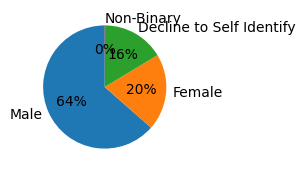

In [60]:
target = 'placed'
feature = 'gender'
data = df

df_counts_target = data[data[target]==1].sort_values(by=feature)[feature].value_counts()
count_target = list(df_counts_target.values)
index_target = list(df_counts_target.index)
plt.figure(figsize=(2,2))
plt.pie(count_target, labels=index_target, autopct='%.0f%%', startangle=90)
plt.show()

<Axes: xlabel='cohort_tag_month'>

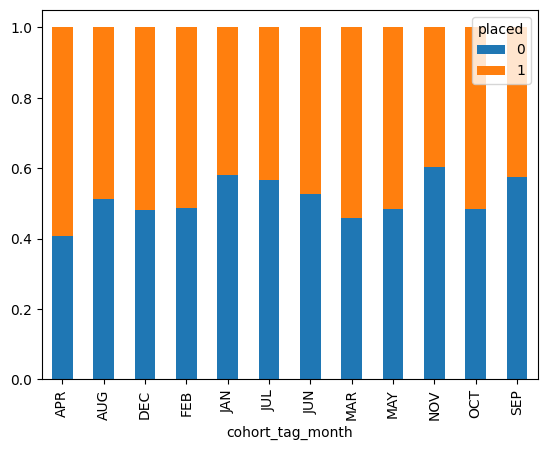

In [81]:
df.groupby('cohort_tag_month')['placed'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=True)

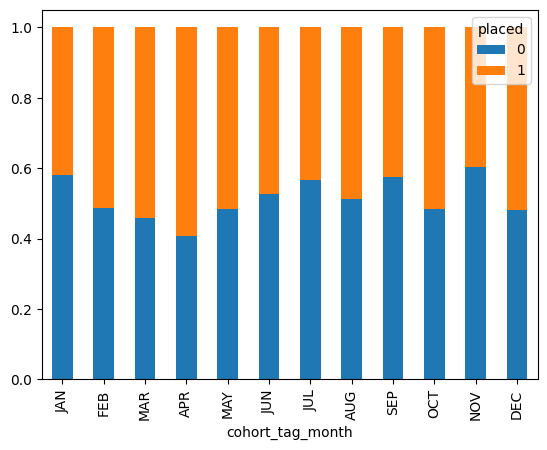

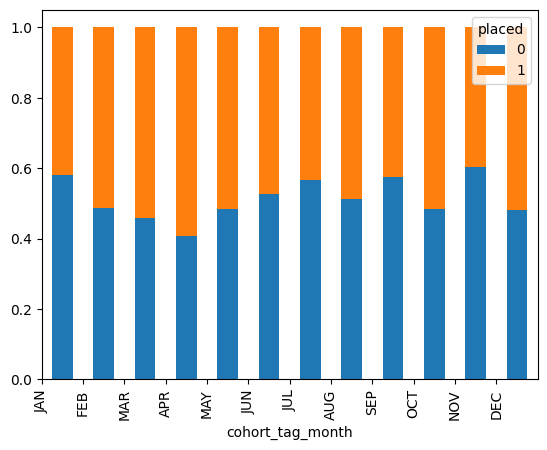

In [83]:
df.groupby('cohort_tag_month')['placed'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=True)

# Define the custom order
custom_order = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Convert cohort_tag_month to a categorical variable with custom order
df['cohort_tag_month'] = pd.Categorical(df['cohort_tag_month'], categories=custom_order, ordered=True)

# Sort the dataframe based on the custom ordered cohort_tag_month
df_sorted = df.sort_values('cohort_tag_month')

df_sorted.groupby('cohort_tag_month')['placed'].value_counts(normalize=True).unstack('placed').plot.bar(stacked=True, position=-0.5)

plt.show()


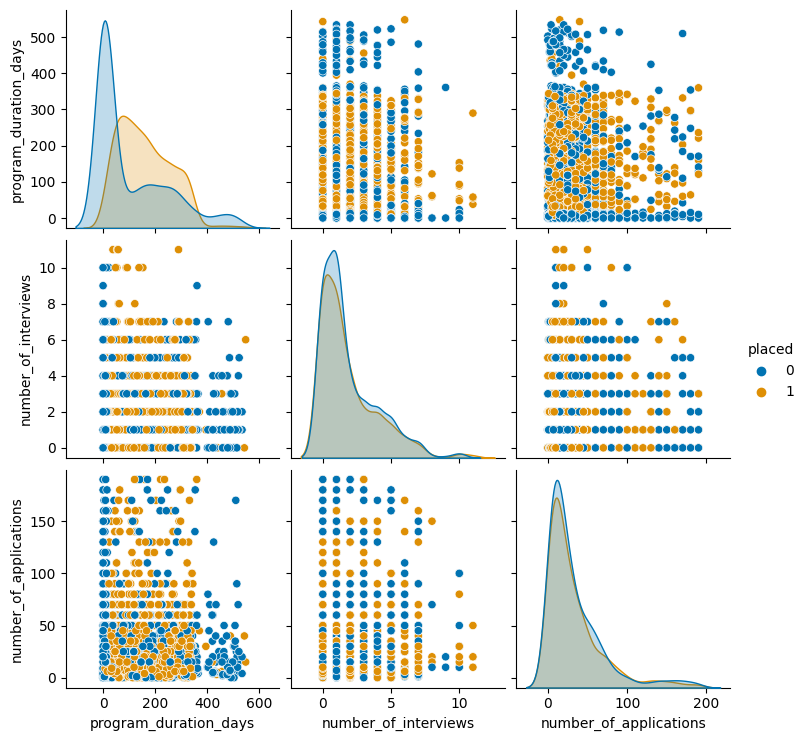

In [84]:
sns.pairplot(data=df, hue='placed', palette='colorblind')
plt.show()

## Dataset Scaling

## Data Scaling

## Data Labeling

In [55]:
categorical_features=['primary_track',
        'employment_status',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race', 'cohort_tag_month', 'cohort_tag_fortnight']

In [56]:
transform_categories_to_numbers(data=df, features=categorical_features)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1953 entries, 1 to 2471
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_track                1953 non-null   int32  
 1   program_duration_days        1953 non-null   float64
 2   placed                       1953 non-null   int64  
 3   employment_status            1953 non-null   int32  
 4   highest_level_of_education   1953 non-null   int32  
 5   length_of_job_search         1953 non-null   int32  
 6   biggest_challenge_in_search  1953 non-null   int32  
 7   professional_experience      1953 non-null   int32  
 8   work_authorization_status    1953 non-null   int32  
 9   number_of_interviews         1953 non-null   float64
 10  number_of_applications       1953 non-null   int64  
 11  gender                       1953 non-null   int32  
 12  race                         1953 non-null   int32  
 13  cohort_tag_month       

In [60]:
import seaborn as sns

<Axes: xlabel='placed', ylabel='count'>

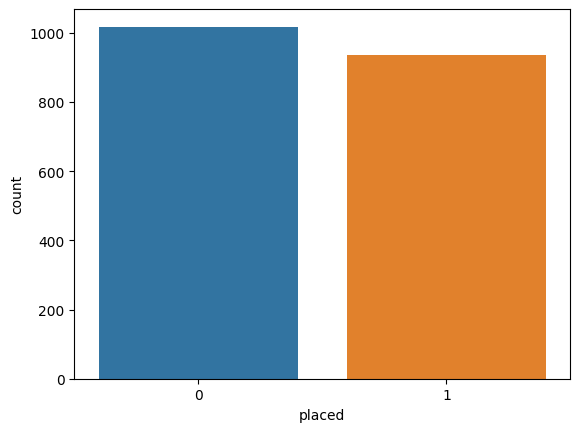

In [61]:
sns.countplot(data=df, x='placed')

In [58]:


df.to_csv('Pathrise_preprocessed.csv', index=False)

